# Python for Machine Learning

### *Session \#2*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Review and Yellowbrick

### Warm Ups

*Type the given code into the cell below*

---

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_excel('titanic.xlsx')

**Create feature matrix/target vector:**
```python
columns = ['fare', 'pclass']
X = df[columns]
y = df['alive']
```                    

**Create train/test split:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

**Create model:**
```python
model = KNeighborsClassifier(n_neighbors=3)
```                    

**Confusion Matrix:**
```python
model_cm = ConfusionMatrix(model)
model_cm.fit(X_train, y_train)
model_cm.score(X_test, y_test)
model_cm.finalize()
```                    



### Exercises
---
**1. Train the model using only** `fare, sibsp, pclass` **in the feature matrix, with** `survived` **as the target vector**

In [57]:
columns = ['fare', 'sibsp', 'pclass']
X = df[columns]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**2. Plot a confusion matrix for the model. What is the accuracy? Sensitivity?**

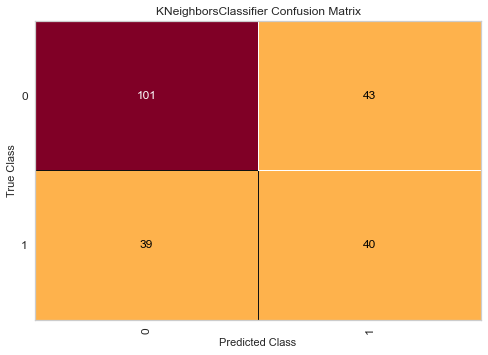

In [58]:
model_cm = ConfusionMatrix(KNeighborsClassifier(n_neighbors=3))
model_cm.fit(X_train, y_train)
model_cm.score(X_test, y_test)
model_cm.finalize()

**3. An alternate form of the confusion matrix is the class prediction error graph.**

**Redo the steps for a confusion matrix, but wrap your model with** `ClassPredictionError()` **instead.**

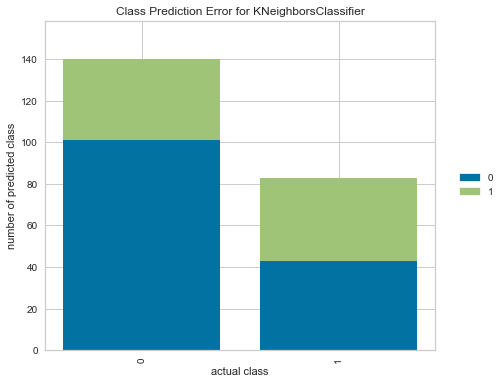

In [59]:
model_cm = ClassPredictionError(KNeighborsClassifier(n_neighbors=3))
model_cm.fit(X_train, y_train)
model_cm.score(X_test, y_test)
model_cm.finalize()

**4. Use** `model.predict()` **on the two new samples below.**

In [60]:
new_samples = pd.DataFrame([[120, 2, 1], [25, 1, 3]], columns=['fare', 'sibsp', 'pclass'])

model.predict(new_samples)

array([1, 0])

**5. You can use** `model.predict_proba()` **to get the probability the model gives to each class instead.**

**Use** `.predict_proba()` **on the new sampels. Which passenger is the model more certain about?**

In [63]:
model.predict_proba(new_samples)

array([[0.        , 1.        ],
       [0.66666667, 0.33333333]])

## II. Missing Data

### Warm Ups

*Type the given code into the cell below*

---

**Find rows with null age:**
```python
null_fare = df['fare'].isnull()
df[null_fare]
```


**Drop rows with nulls:**`df.dropna(subset=['fare'])`                    
*Hint: You can also set* `inplace=True` *to change the original dataframe*


**Find count of nulls:**`df.isnull().sum()`                    



**Find percentage of nulls:**`df.isnull().mean()`                    



**Fill in nulls based on filter:**
```python
df.loc[null_fare, 'fare'] = df['fare'].mean()
```

### Exercises
---

**1. Find all the rows where** `deck` **is null.**

In [83]:
null_deck = df['deck'].isnull()

df[null_deck]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


**2. How many nulls are there in the** `age` **column? The** `embarked` **column?** 

In [72]:
nulls = df.isnull().sum()

print(nulls['age'])
print(nulls['embarked'])

177

**3. Find the percentage of nulls across all columns. For columns with <5% nulls, drop rows the rows with missing values.**

In [86]:
df.isnull().mean()

df.dropna(subset=['embarked', 'embark_town'], inplace=True)

**4. Drop columns with more than 50% nulls.**

In [87]:
df.drop(columns=['deck'], inplace=True)

**5. Fill in the age nulls by taking the average age across the** `who` **column**

**So, men with nulls would get the average age of people with** `man` **in the** `who` **column, children with nulls would get the average age of people with** `child` **in the** `who` **column**

In [89]:
child = df['who'] == 'child'
df.loc[child, 'age'] = df[child]['age'].mean()

man = df['who'] == 'man'
df.loc[man, 'age'] = df[man]['age'].mean()

woman = df['who'] == 'woman'
df.loc[woman, 'age'] = df[woman]['age'].mean()

## III. Scaling and One-Hot Encoding

### Warm Ups

*Type the given code into the cell below*

---

**Imports for One-Hot Encoding and Pipelines:**

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

**Add encoding to model using pipeline:**
```python
model = make_pipeline(OneHotEncoder(), KNeighborsClassifier(3))
```

**Add StandardScaler to model using pipeline:**
```python
model = make_pipeline(StandardScaler(), KNeighborsClassifier(3))
```

**Split pipeline between two types of columns:**
```python
numeric = ['fare', 'age']
categorical = ['pclass', 'embark_town', 'who']

column_transformer = make_column_transformer(
        (StandardScaler(), numeric),
        (OneHotEncoder(), categorical)
    )

model = make_pipeline(column_transformer, KNeighborsClassifier(3))
```

### Exercises
---

**1. Create a new feature matrix X by dropping the** `alive` **and** `survived` **columns of** `df` 

**Then create** `X_num` **with just the numeric inputs and** `X_cat` **with just categorical data**

Hint: You can use `df.select_dtypes()` to isolate the categorical (ie. 'object') columns and numeric columns (ie. 'int64', 'float64')

In [103]:
X = df.drop(columns=['alive', 'survived'])

X_num = X.select_dtypes(['int64', 'float64'])
X_cat = X.select_dtypes('object')

**2. Create a** `OneHotEncoder(sparse=False)` **object as** `encoder` **and call** `encoder.fit_transform()` **on the categorical columns of X**

Note: The `sparse=False` parameter makes the output a normal Numpy array

In [104]:
encoder = OneHotEncoder(sparse=False)

encoder.fit_transform(X_cat)

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

**3. Create a model based on only the categorical features of X. Fit the model to the data, and find the model's accuracy.**

Hint: Use a pipeline and OneHotEncoder()

In [105]:
model = make_pipeline(OneHotEncoder(), KNeighborsClassifier(3))

X_train, X_test, y_train, y_test = train_test_split(X_cat, y)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7982062780269058

**4. Create a model based on only the numeric features of X, which preprocesses data using StandardScaler(). Fit the model to the data, and find the accuracy.**

In [106]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(3))

X_train, X_test, y_train, y_test = train_test_split(X_num, y)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7533632286995515

**5. Use a ColumnTransformer to create a model with both** `OneHotEncoder()` **and** `StandardScaler()` **preprocessing for the appropriate columns. What's the accuracy for this combined model?**

In [107]:
X = df.drop(columns=["survived", "alive"])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

column_transformer = make_column_transformer(
        (StandardScaler(), X_num.columns),
        (OneHotEncoder(), X_cat.columns)
    )

model = make_pipeline(column_transformer, KNeighborsClassifier(3))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8251121076233184

**6. You can also combine Yellowbrick visualizers with pipelines!**

**After creating your pipeline with** `make_pipeline()` **, but before fitting to training data, wrap your model with** `ConfusionMatrix()` 

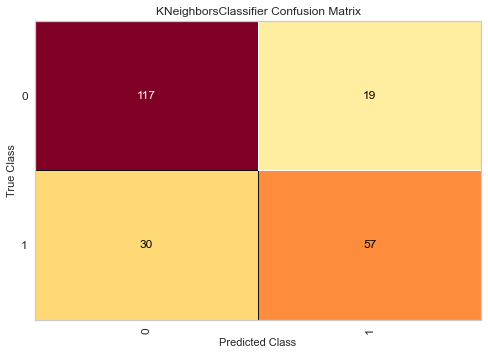

In [109]:
X = df.drop(columns=["survived", "alive"])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

column_transformer = make_column_transformer(
        (StandardScaler(), X_num.columns),
        (OneHotEncoder(), X_cat.columns)
    )

model = make_pipeline(column_transformer, KNeighborsClassifier(3))

viz = ConfusionMatrix(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()